# NYSED School Report Card Project

## Variable descriptions (from the original data curated by NYSED):

- ```INSTITUTION_ID```: 12-digit unique school identifier which remains consistent over time.

- ```ENTITY_CD```: Also a 12-digit school identifier, but the code will update with changes in location, district, or any other subgroup assignments. Using the ```ENTITY_CD``` variable, along with the associated documentation, we can filter schools by location (county/city/town), school district, and type of school.

More information about this variable can be found in the PDF README file attached to this repo.

- ```ENTITY_NAME```: The name of the school.

- ```WEIGHTED_INDEX```: Weighted Average Performance Index for the Subgroup by Subject.

- ```ENROLLMENT```: Number of students in grades 9-12 (and ungraded age equivalent) enrolled for 10 or more instructional days and present for at least one of those days.

- ```ABSENT_COUNT```: Number of students in grades 9-12 (and ungraded age equivalent) enrolled for 10 or more instructional days, present for at least one of those days, and absent for 10% or more of enrolled days.

- ```GRAD_COUNT```: Number of students in the ```COHORT_COUNT``` who graduated as of August 31st of the year prior to the reporting year. Not reported for “Combined” cohort.

- ```COHORT_COUNT```: Number of students in the cohort as of June 30th of the year prior to the reporting year. Not reported for “Combined” cohort.

- ```ELA_P_RATE```: Percent of students in grade 12 in the current year with a valid score on an approved ELA assessment.

- ```MATH_P_RATE```: Percent of students in grade 12 in the current year with a valid score on an approved Math assessment.

- ```PUPIL_COUNT_TOT```: Pupil counts for districts, schools, and statewide.

- ```FED_STATE_LOCAL_EXP```: Total federal and state/local expenditures.

- ```NUM_TEACH```: Number of teachers as reported in the Student Information Repository System (SIRS).

- ```NUM_TEACH_INEXP```: Number of teachers with fewer than four years of experience in their positions.

- ```NUM_TEACH_OC```: Number of teachers as reported in the Student Information Repository System (SIRS).

- ```NUM_OUT_CERT```: Number of teachers teaching out of their subject/field of certification.

- ```OVERALL_STATUS```: Categorical variable denoting the level of support and improvement that a school is designated (Local Support and Improvement, Targeted Support and Improvement, Additional Targeted Support and Improvement, Comprehensive Support and Improvement).

More information about this variable can be found in [this link](https://www.nysed.gov/sites/default/files/programs/accountability/24-25-sy-haw.pdf).

- ```NEEDS_INDEX_DESCRIPTION```: Categorical variable denoting the "need-to-resource category" that a school is designated: (1) 'High Need/Resource Category: New York City Districts', (2) 'High Need/Resource Category: Large City Districts', (3) 'High Need/Resource Category: Urban-Suburban Districts', (4) 'High Need/Resource Category: Rural Districts', (5) 'Average Need/Resource Category Districts', (6) 'Low Need/Resource Category Districts', (7) 'Need/Resource Category: Charter Schools'.

### Variables re-created in Python:

I also re-created some variables in the original README file but are re-created in Python to avoid any rounding problems while migrating data from SQL to Python. These are:

- ```ABSENT_RATE```: Chronic absenteeism rate for current reporting year (```= ABSENT_COUNT / ENROLLMENT * 100```)

- ```GRAD_RATE```: Graduation rate of the 4-year graduation rate total cohort (```= GRAD_COUNT / COHORT_COUNT * 100```)

- ```PER_FED_STATE_LOCAL_EXP```: Per pupil expenditures using federal and state/local funds (```= FED_STATE_LOCAL_EXP / PUPIL_COUNT_TOT```)

- ```PER_TEACH_INEXP```: Percent of teachers with fewer than four years of experience in their positions (```= NUM_TEACH_INEXP / NUM_TEACH * 100```)

- ```PER_OUT_CERT```: Percent of teachers teaching out of their subject/field of certification (```= NUM_OUT_CERT / NUM_TEACH_OC * 100```)

## I. Importing the data and necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nysed_2024 = pd.read_csv('data/nysed_2024_preprocessing.csv')
nysed_2024.head()

,INSTITUTION_ID,ENTITY_CD,ENTITY_NAME,WEIGHTED_INDEX,ENROLLMENT,ABSENT_COUNT,GRAD_COUNT,COHORT_COUNT,ELA_P_RATE,MATH_P_RATE,PUPIL_COUNT_TOT,FED_STATE_LOCAL_EXP,NUM_TEACH,NUM_TEACH_INEXP,NUM_TEACH_OC,NUM_OUT_CERT,OVERALL_STATUS,NEEDS_INDEX_DESCRIPTION
0,800000055743,10100010034,ALBANY HIGH SCHOOL,82.2,3046,1550,549,704,98.9,84.3,2764,94032063,235,63,214,14,Local Support and Improvement,High Need/Resource Category: Urban-Suburban Di...
1,800000055479,10201040001,BERNE-KNOX-WESTERLO JUNIOR-SENIOR HS,142.3,222,42,47,53,100.0,86.7,326,11481752,41,11,41,1,Local Support and Improvement,Average Need/Resource Category Districts
2,800000055439,10306060008,BETHLEHEM CENTRAL SENIOR HIGH SCHOOL,198.1,1374,155,333,349,99.4,92.1,1373,32156676,110,9,107,1,Local Support and Improvement,Low Need/Resource Category Districts
3,800000055436,10402060001,RAVENA-COEYMANS-SELKIRK SR HS,129.2,530,164,118,133,100.0,87.9,518,13997053,59,24,55,3,Local Support and Improvement,Average Need/Resource Category Districts
4,800000055426,10500010007,COHOES HIGH SCHOOL,94.0,619,326,109,132,100.0,81.0,593,14868772,52,8,51,0,Local Support and Improvement,High Need/Resource Category: Urban-Suburban Di...


In [3]:
nysed_2024['ABSENT_RATE'] = nysed_2024['ABSENT_COUNT'] / nysed_2024['ENROLLMENT']
nysed_2024['GRAD_RATE'] = nysed_2024['GRAD_COUNT'] / nysed_2024['COHORT_COUNT']
nysed_2024['PER_FED_STATE_LOCAL_EXP'] = nysed_2024['FED_STATE_LOCAL_EXP'] / nysed_2024['PUPIL_COUNT_TOT']
nysed_2024['PER_TEACH_INEXP'] = nysed_2024['NUM_TEACH_INEXP'] / nysed_2024['NUM_TEACH']
nysed_2024['PER_OUT_CERT'] = nysed_2024['NUM_OUT_CERT'] / nysed_2024['NUM_TEACH_OC']

In [4]:
nysed_2024.head()

,INSTITUTION_ID,ENTITY_CD,ENTITY_NAME,WEIGHTED_INDEX,ENROLLMENT,ABSENT_COUNT,GRAD_COUNT,COHORT_COUNT,ELA_P_RATE,MATH_P_RATE,...,NUM_TEACH_INEXP,NUM_TEACH_OC,NUM_OUT_CERT,OVERALL_STATUS,NEEDS_INDEX_DESCRIPTION,ABSENT_RATE,GRAD_RATE,PER_FED_STATE_LOCAL_EXP,PER_TEACH_INEXP,PER_OUT_CERT
0,800000055743,10100010034,ALBANY HIGH SCHOOL,82.2,3046,1550,549,704,98.9,84.3,...,63,214,14,Local Support and Improvement,High Need/Resource Category: Urban-Suburban Di...,0.508864,0.779830,34020.283285,0.268085,0.065421
1,800000055479,10201040001,BERNE-KNOX-WESTERLO JUNIOR-SENIOR HS,142.3,222,42,47,53,100.0,86.7,...,11,41,1,Local Support and Improvement,Average Need/Resource Category Districts,0.189189,0.886792,35220.098160,0.268293,0.024390
2,800000055439,10306060008,BETHLEHEM CENTRAL SENIOR HIGH SCHOOL,198.1,1374,155,333,349,99.4,92.1,...,9,107,1,Local Support and Improvement,Low Need/Resource Category Districts,0.112809,0.954155,23420.739985,0.081818,0.009346
3,800000055436,10402060001,RAVENA-COEYMANS-SELKIRK SR HS,129.2,530,164,118,133,100.0,87.9,...,24,55,3,Local Support and Improvement,Average Need/Resource Category Districts,0.309434,0.887218,27021.337838,0.406780,0.054545
4,800000055426,10500010007,COHOES HIGH SCHOOL,94.0,619,326,109,132,100.0,81.0,...,8,51,0,Local Support and Improvement,High Need/Resource Category: Urban-Suburban Di...,0.526656,0.825758,25073.814503,0.153846,0.000000


## II. Exploratory data analysis

### 1. Initial exploration of the data

In [5]:
nysed_2024.shape

(990, 23)

In [6]:
nysed_2024.describe()

,INSTITUTION_ID,ENTITY_CD,WEIGHTED_INDEX,ENROLLMENT,ABSENT_COUNT,GRAD_COUNT,COHORT_COUNT,ELA_P_RATE,MATH_P_RATE,PUPIL_COUNT_TOT,FED_STATE_LOCAL_EXP,NUM_TEACH,NUM_TEACH_INEXP,NUM_TEACH_OC,NUM_OUT_CERT,ABSENT_RATE,GRAD_RATE,PER_FED_STATE_LOCAL_EXP,PER_TEACH_INEXP,PER_OUT_CERT
count,9.900000e+02,9.900000e+02,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,949.000000,990.000000,9.900000e+02,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,8.000001e+11,3.490071e+11,117.198586,755.427273,233.007071,163.050505,182.601010,95.714343,84.129821,796.629293,2.282600e+07,70.062626,12.980808,67.656566,6.235354,0.351075,0.882767,29896.664771,0.202937,0.116564
std,1.222746e+04,1.563176e+11,48.521109,673.587789,230.874468,152.568874,167.142575,11.664413,16.813701,646.010156,1.745835e+07,45.829178,10.892834,44.336123,10.043795,0.205835,0.136408,6408.318318,0.126757,0.159363
min,8.000000e+11,1.010001e+10,1.600000,140.000000,0.000000,7.000000,50.000000,1.000000,6.400000,93.000000,2.250587e+06,13.000000,0.000000,11.000000,0.000000,0.000000,0.140000,11519.781971,0.000000,0.000000
25%,8.000000e+11,2.804023e+11,77.100000,363.000000,105.000000,73.000000,84.000000,96.900000,77.400000,389.000000,1.171352e+07,38.000000,6.000000,37.000000,1.000000,0.205318,0.852273,25820.996796,0.106383,0.016810
50%,8.000001e+11,3.313000e+11,119.400000,485.000000,171.000000,103.000000,114.000000,99.100000,89.900000,564.500000,1.609681e+07,54.000000,10.000000,52.000000,4.000000,0.307280,0.917808,29200.819512,0.176471,0.069570
75%,8.000001e+11,4.218000e+11,153.200000,944.750000,257.500000,210.750000,228.750000,100.000000,95.900000,1023.000000,2.919355e+07,90.000000,17.000000,86.750000,7.000000,0.453353,0.958904,33163.077350,0.275805,0.147059
max,8.000001e+11,6.806011e+11,241.500000,5794.000000,1617.000000,1456.000000,1498.000000,100.000000,100.000000,5810.000000,1.341109e+08,344.000000,79.000000,331.000000,93.000000,1.000000,1.000000,80138.655488,0.782178,0.898734


In [7]:
nysed_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INSTITUTION_ID           990 non-null    int64  
 1   ENTITY_CD                990 non-null    int64  
 2   ENTITY_NAME              990 non-null    object 
 3   WEIGHTED_INDEX           990 non-null    float64
 4   ENROLLMENT               990 non-null    int64  
 5   ABSENT_COUNT             990 non-null    int64  
 6   GRAD_COUNT               990 non-null    int64  
 7   COHORT_COUNT             990 non-null    int64  
 8   ELA_P_RATE               990 non-null    float64
 9   MATH_P_RATE              949 non-null    float64
 10  PUPIL_COUNT_TOT          990 non-null    int64  
 11  FED_STATE_LOCAL_EXP      990 non-null    int64  
 12  NUM_TEACH                990 non-null    int64  
 13  NUM_TEACH_INEXP          990 non-null    int64  
 14  NUM_TEACH_OC             9

In [8]:
nysed_2024.nunique()

INSTITUTION_ID             987
ENTITY_CD                  987
ENTITY_NAME                985
WEIGHTED_INDEX             772
ENROLLMENT                 651
ABSENT_COUNT               413
GRAD_COUNT                 351
COHORT_COUNT               341
ELA_P_RATE                 172
MATH_P_RATE                381
PUPIL_COUNT_TOT            687
FED_STATE_LOCAL_EXP        987
NUM_TEACH                  172
NUM_TEACH_INEXP             62
NUM_TEACH_OC               173
NUM_OUT_CERT                54
OVERALL_STATUS               4
NEEDS_INDEX_DESCRIPTION      7
ABSENT_RATE                970
GRAD_RATE                  758
PER_FED_STATE_LOCAL_EXP    987
PER_TEACH_INEXP            603
PER_OUT_CERT               445
dtype: int64

In [9]:
nysed_2024.isna().sum()

INSTITUTION_ID              0
ENTITY_CD                   0
ENTITY_NAME                 0
WEIGHTED_INDEX              0
ENROLLMENT                  0
ABSENT_COUNT                0
GRAD_COUNT                  0
COHORT_COUNT                0
ELA_P_RATE                  0
MATH_P_RATE                41
PUPIL_COUNT_TOT             0
FED_STATE_LOCAL_EXP         0
NUM_TEACH                   0
NUM_TEACH_INEXP             0
NUM_TEACH_OC                0
NUM_OUT_CERT                0
OVERALL_STATUS              0
NEEDS_INDEX_DESCRIPTION     0
ABSENT_RATE                 0
GRAD_RATE                   0
PER_FED_STATE_LOCAL_EXP     0
PER_TEACH_INEXP             0
PER_OUT_CERT                0
dtype: int64

There are missing values in the ```MATH_P_RATE``` column. However, the missing rate for this column is relatively small compared to the dataset (less than 5%). Therefore, I decided that I would impute these missing values before applying any learning models to the data.

In [10]:
# List of numerical columns (apart from INSTITUTION_ID and ENTITY_CD)
numerical_cols = nysed_2024.describe().columns.drop(['INSTITUTION_ID', 'ENTITY_CD'])
numerical_cols

Index(['WEIGHTED_INDEX', 'ENROLLMENT', 'ABSENT_COUNT', 'GRAD_COUNT',
       'COHORT_COUNT', 'ELA_P_RATE', 'MATH_P_RATE', 'PUPIL_COUNT_TOT',
       'FED_STATE_LOCAL_EXP', 'NUM_TEACH', 'NUM_TEACH_INEXP', 'NUM_TEACH_OC',
       'NUM_OUT_CERT', 'ABSENT_RATE', 'GRAD_RATE', 'PER_FED_STATE_LOCAL_EXP',
       'PER_TEACH_INEXP', 'PER_OUT_CERT'],
      dtype='object')

Text(0.5, 1.0, 'Correlation between numerical variables of the NYSED 2024 dataset')

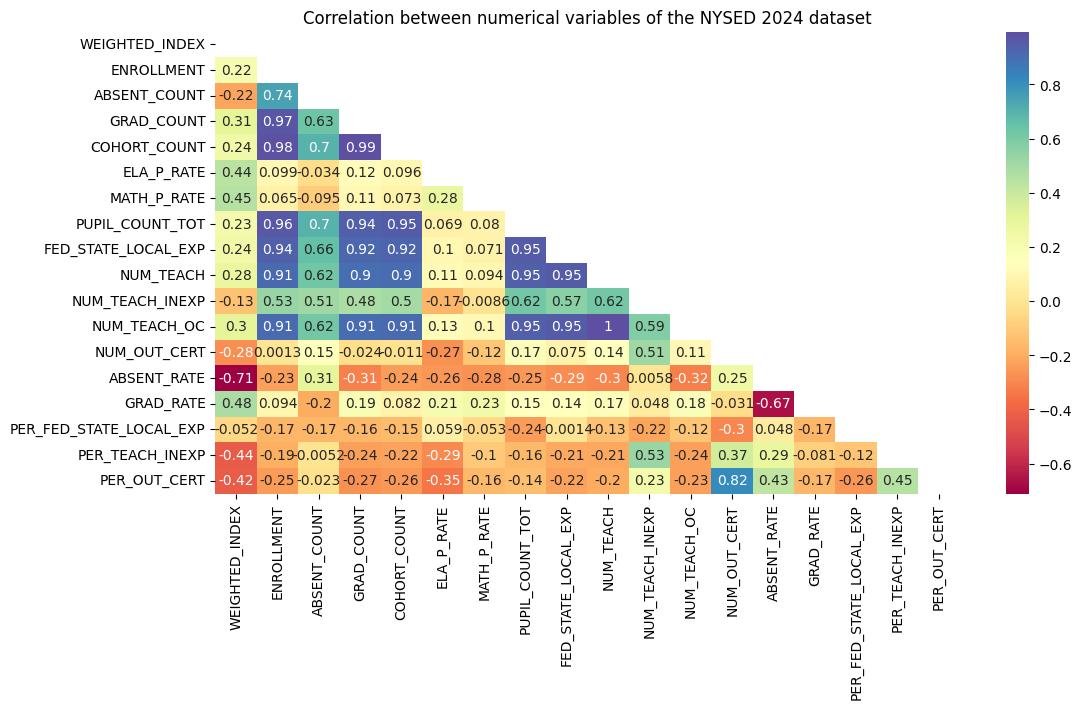

In [11]:
# Check the correlation between selected numerical columns
nysed_2024_corr = nysed_2024[numerical_cols].corr()
plt.figure(figsize = (12, 6))
sns.heatmap(data = nysed_2024_corr, mask = np.triu(nysed_2024_corr), cmap = 'Spectral', annot = True)
# Used np.triu to show only the lower triangle of the correlation graph
plt.title('Correlation between numerical variables of the NYSED 2024 dataset')

There is a region in the heatmap that contains extremely strong linear correlations between the variables (0.9 and above). This means that when I preprocess the data, I have to remove a lot of variables.

I still need to explore the data further before deciding which variables should be kept or removed, but from the correlation heatmap and my knowledge of the dataset, there are a few features that refer to the same subject:

- From the EDA, I noticed that ```NUM_TEACH``` and ```NUM_TEACH_OC``` is actually the same number. Their only difference is that they are aggregated from different tables in the NYSED-2024 database. I will eliminate the variable ```NUM_TEACH_OC```.

- ```ENROLLMENT```, ```COHORT_COUNT``` and ```PUPIL_COUNT_TOT``` all refers to the number of students with different grade levels and different types of aggregations. These variables are all very strongly correlated, so I will keep ```ENROLLMENT``` and remove the other two variables.

### 2. What is the distribution of accountability status across high schools in New York State?

In [12]:
nysed_2024.drop(['NUM_TEACH_OC', 'COHORT_COUNT', 'PUPIL_COUNT_TOT'], axis = 1)
print(nysed_2024.shape)
nysed_2024.head()

(990, 23)


,INSTITUTION_ID,ENTITY_CD,ENTITY_NAME,WEIGHTED_INDEX,ENROLLMENT,ABSENT_COUNT,GRAD_COUNT,COHORT_COUNT,ELA_P_RATE,MATH_P_RATE,...,NUM_TEACH_INEXP,NUM_TEACH_OC,NUM_OUT_CERT,OVERALL_STATUS,NEEDS_INDEX_DESCRIPTION,ABSENT_RATE,GRAD_RATE,PER_FED_STATE_LOCAL_EXP,PER_TEACH_INEXP,PER_OUT_CERT
0,800000055743,10100010034,ALBANY HIGH SCHOOL,82.2,3046,1550,549,704,98.9,84.3,...,63,214,14,Local Support and Improvement,High Need/Resource Category: Urban-Suburban Di...,0.508864,0.779830,34020.283285,0.268085,0.065421
1,800000055479,10201040001,BERNE-KNOX-WESTERLO JUNIOR-SENIOR HS,142.3,222,42,47,53,100.0,86.7,...,11,41,1,Local Support and Improvement,Average Need/Resource Category Districts,0.189189,0.886792,35220.098160,0.268293,0.024390
2,800000055439,10306060008,BETHLEHEM CENTRAL SENIOR HIGH SCHOOL,198.1,1374,155,333,349,99.4,92.1,...,9,107,1,Local Support and Improvement,Low Need/Resource Category Districts,0.112809,0.954155,23420.739985,0.081818,0.009346
3,800000055436,10402060001,RAVENA-COEYMANS-SELKIRK SR HS,129.2,530,164,118,133,100.0,87.9,...,24,55,3,Local Support and Improvement,Average Need/Resource Category Districts,0.309434,0.887218,27021.337838,0.406780,0.054545
4,800000055426,10500010007,COHOES HIGH SCHOOL,94.0,619,326,109,132,100.0,81.0,...,8,51,0,Local Support and Improvement,High Need/Resource Category: Urban-Suburban Di...,0.526656,0.825758,25073.814503,0.153846,0.000000


The ```OVERALL_STATUS``` column is a categorical variable with an ordinal measurement scale. To avoid inconsistencies in arranging displays of these categories on graphs, I have to explicitly declare the column as categorical with a predefined order, as shown in the code cell below.

In [13]:
# Set the "Overall Status" as a categorical variable with an ordinal scale of measurement
nysed_2024['OVERALL_STATUS'] = pd.Categorical(nysed_2024['OVERALL_STATUS'], ordered = True,
                                              categories = ['Local Support and Improvement', 'Targeted Support and Improvement',
                                                            'Additional Targeted Support and Improvement', 'Comprehensive Support and Improvement'])

In [14]:
# Number of schools with different statuses (counts and proportions)
nysed_2024['OVERALL_STATUS'].value_counts()

OVERALL_STATUS
Local Support and Improvement                  939
Comprehensive Support and Improvement           24
Targeted Support and Improvement                19
Additional Targeted Support and Improvement      8
Name: count, dtype: int64

Because the accountability level labels in the ```OVERALL_STATUS``` is so long, I have decided to shorten these labels to Local, Targeted, Additional and Comprehensive whenever I need to display them on a graph.

Text(0.5, 0.01, 'Accountability status')

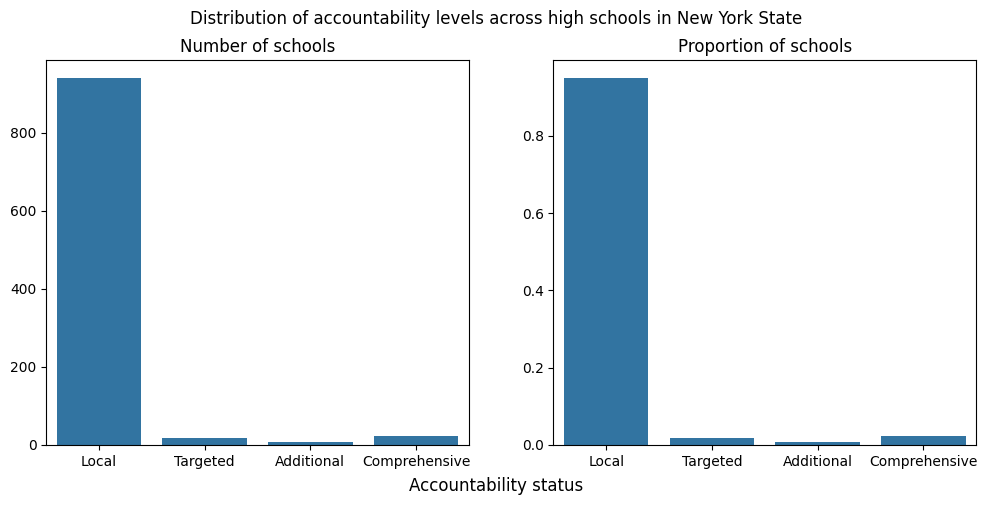

In [15]:
# Visualize them as a graph

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))

sns.countplot(x = 'OVERALL_STATUS', data = nysed_2024, ax = ax[0])
ax[0].set_xticks(ticks = [0, 1, 2, 3], labels = ['Local', 'Targeted', 'Additional', 'Comprehensive'])
ax[0].set_title('Number of schools')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

sns.countplot(x = 'OVERALL_STATUS', data = nysed_2024, stat = 'proportion', ax = ax[1])
ax[1].set_xticks(ticks = [0, 1, 2, 3], labels = ['Local', 'Targeted', 'Additional', 'Comprehensive'])
ax[1].set_title('Proportion of schools')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

fig.suptitle('Distribution of accountability levels across high schools in New York State')
fig.supxlabel('Accountability status')

From the graphs, we can see that the data is very imbalanced if we classify it by accountability status. Over 90% of the schools are classified as "Local Support and Improvement", the lowest and the typical level of support that schools typically receive.

The other accountability levels (Targeted, Additional, and Comprehensive) constitute a very small part of the dataset. In the subsequent cells, I will create a new variable called ```HELP_INDICATOR```, which aggregates these minority levels in a category called "Extra support needed".

In [16]:
nysed_2024['HELP_INDICATOR'] = nysed_2024['OVERALL_STATUS'].case_when([
    (nysed_2024['OVERALL_STATUS'] != 'Local Support and Improvement', 1),
    (nysed_2024['OVERALL_STATUS'] == 'Local Support and Improvement', 0)
])

nysed_2024[['OVERALL_STATUS', 'HELP_INDICATOR']].sample(n = 5, random_state = 275225)

,OVERALL_STATUS,HELP_INDICATOR
108,Local Support and Improvement,0
413,Comprehensive Support and Improvement,1
984,Local Support and Improvement,0
661,Targeted Support and Improvement,1
962,Local Support and Improvement,0


### 3. What is the distribution of need-to-resource categories across high schools in New York State?

**(Interpretation in progress)**

In [58]:
nrc_order = ['High Need/Resource Category: New York City Districts',
             'High Need/Resource Category: Large City Districts',
             'High Need/Resource Category: Urban-Suburban Districts',
             'High Need/Resource Category: Rural Districts',
             'Average Need/Resource Category Districts',
             'Low Need/Resource Category Districts',
             'Need/Resource Category: Charter Schools']

In [59]:
nysed_2024['NEEDS_INDEX_DESCRIPTION'] = pd.Categorical(nysed_2024['NEEDS_INDEX_DESCRIPTION'], ordered = True,
                                              categories = nrc_order)

In [60]:
# Number of schools with different statuses (counts and proportions)
nysed_2024['NEEDS_INDEX_DESCRIPTION'].value_counts()

NEEDS_INDEX_DESCRIPTION
High Need/Resource Category: New York City Districts     391
Average Need/Resource Category Districts                 260
Low Need/Resource Category Districts                     121
High Need/Resource Category: Rural Districts              72
Need/Resource Category: Charter Schools                   63
High Need/Resource Category: Urban-Suburban Districts     44
High Need/Resource Category: Large City Districts         39
Name: count, dtype: int64

Text(97.72222222222221, 0.5, 'Proportion')

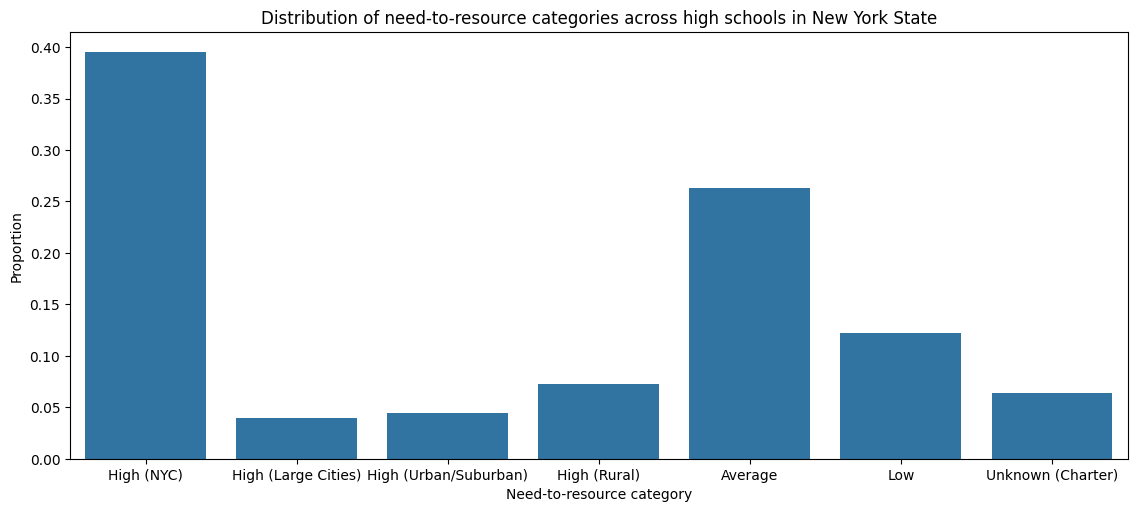

In [75]:
# Visualize them as a graph (proportions only)

fig, ax = plt.subplots(figsize = (11.5, 5))

sns.countplot(x = 'NEEDS_INDEX_DESCRIPTION', data = nysed_2024, stat = 'proportion', order = nrc_order, ax = ax)
ax.set_xticks(ticks = range(nysed_2024['NEEDS_INDEX_DESCRIPTION'].nunique()),
              labels = ['High (NYC)', 'High (Large Cities)', 'High (Urban/Suburban)',
                        'High (Rural)', 'Average', 'Low', 'Unknown (Charter)'])

plt.tight_layout()
ax.set_title('Distribution of need-to-resource categories across high schools in New York State')
ax.set_xlabel('Need-to-resource category')
ax.set_ylabel('Proportion')

### 4. How are numerical columns in the data distributed?

In [17]:
# Numerical columns when I eliminated columns with redundant meanings
numerical_cols = nysed_2024.describe().columns.drop(['INSTITUTION_ID', 'ENTITY_CD'])
print(numerical_cols)
print(len(numerical_cols))

Index(['WEIGHTED_INDEX', 'ENROLLMENT', 'ABSENT_COUNT', 'GRAD_COUNT',
       'COHORT_COUNT', 'ELA_P_RATE', 'MATH_P_RATE', 'PUPIL_COUNT_TOT',
       'FED_STATE_LOCAL_EXP', 'NUM_TEACH', 'NUM_TEACH_INEXP', 'NUM_TEACH_OC',
       'NUM_OUT_CERT', 'ABSENT_RATE', 'GRAD_RATE', 'PER_FED_STATE_LOCAL_EXP',
       'PER_TEACH_INEXP', 'PER_OUT_CERT'],
      dtype='object')
18


Text(0.5, 1.02, 'Distribution of each numerical column in the NYSED 2024 dataset (histograms)')

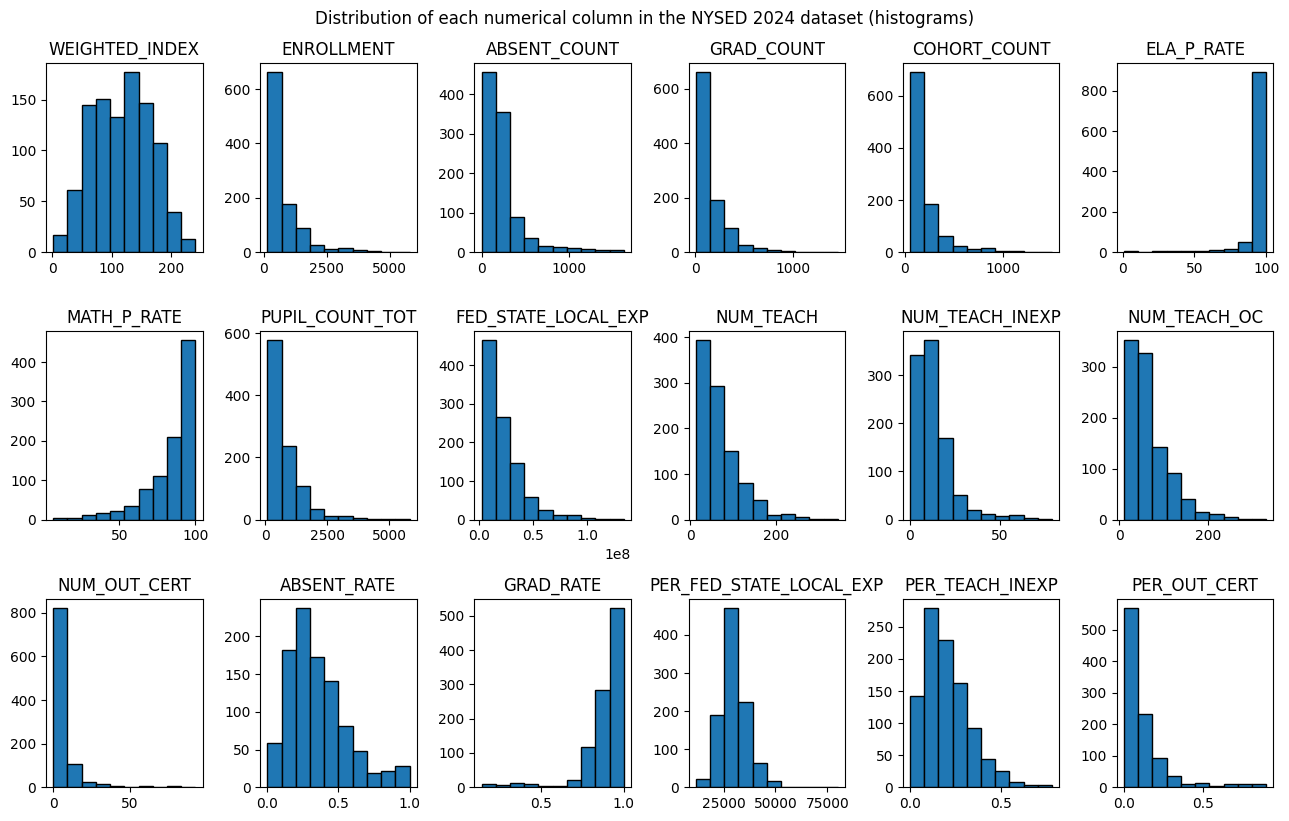

In [18]:
fig, ax = plt.subplots(nrows = 3, ncols = 6, figsize = (13, 8))

# The counter method: https://www.kaggle.com/code/aleksandradeis/bank-marketing-analysis/notebook
counter = 0
for var in numerical_cols:
    ax[counter // 6][counter % 6].hist(nysed_2024[var], edgecolor = 'black')
    ax[counter // 6][counter % 6].set_title(var)
    counter += 1

fig.tight_layout() # make sure that the graph titles and axes don't overlap with each other
fig.suptitle('Distribution of each numerical column in the NYSED 2024 dataset (histograms)', y = 1.02)

Text(0.5, 1.02, 'Distribution of each numerical column in the NYSED 2024 dataset (box plots)')

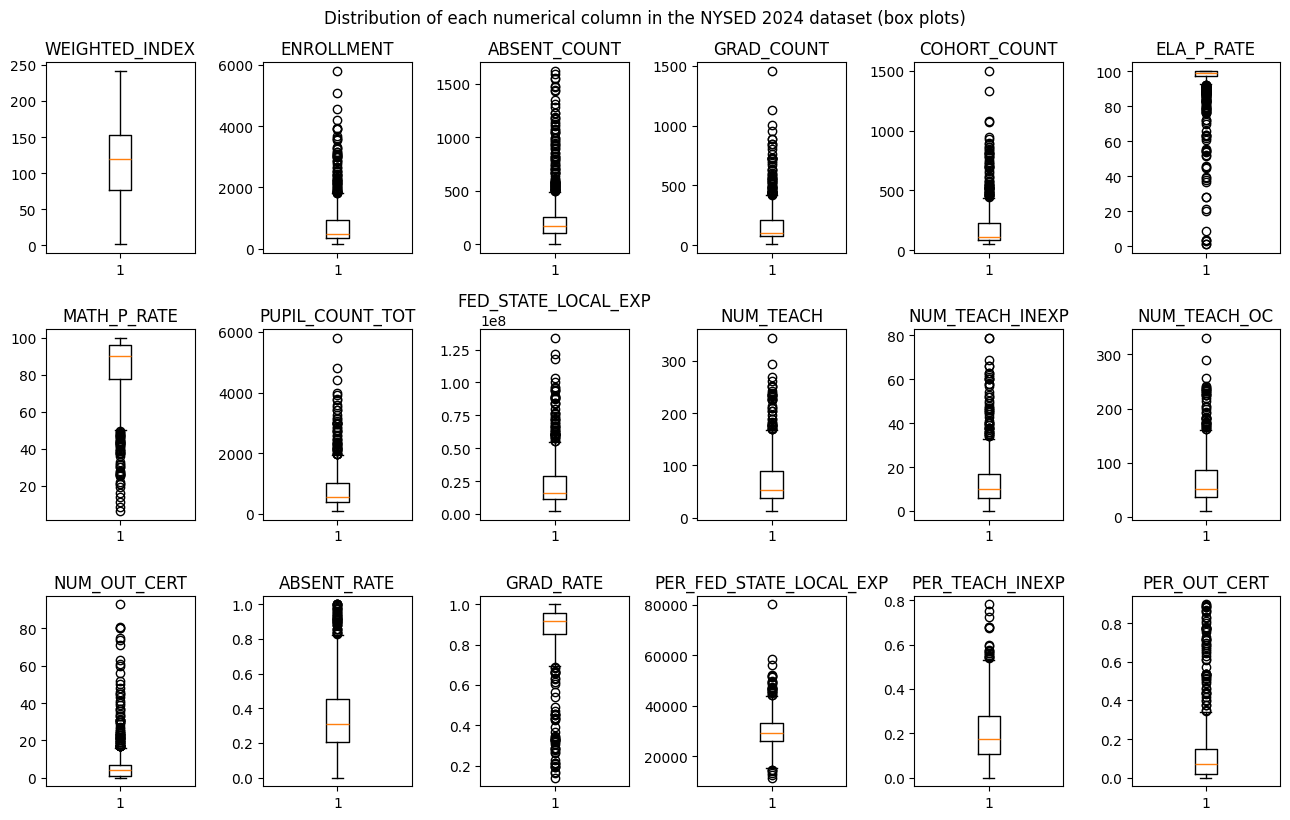

In [19]:
fig, ax = plt.subplots(nrows = 3, ncols = 6, figsize = (13, 8))

# The counter method: https://www.kaggle.com/code/aleksandradeis/bank-marketing-analysis/notebook
counter = 0
for var in numerical_cols:
    ax[counter // 6][counter % 6].boxplot(nysed_2024[nysed_2024[var].notna()][var]) # avoid missing values
    ax[counter // 6][counter % 6].set_title(var)
    counter += 1

fig.tight_layout() # make sure that the graph titles and axes don't overlap with each other
fig.suptitle('Distribution of each numerical column in the NYSED 2024 dataset (box plots)', y = 1.02)

The vast majority of numerical variables in the dataset has a skewed distribution, apart from the ```WEIGHTED_INDEX``` which follows a normal distribution.

```ABSENT_RATE``` and ```PER_TEACH_INEXP``` are variables that have the least skewness. Both of them follow a slight right-skewed distribution. The other variables are heavily skewed, and I should check if one or more variables are more skewed than the others.

In [20]:
nysed_2024[numerical_cols].skew().sort_values(ascending = False) # sign of skewness included

NUM_OUT_CERT               4.340736
ABSENT_COUNT               3.017164
COHORT_COUNT               2.795831
GRAD_COUNT                 2.788139
PER_OUT_CERT               2.733236
ENROLLMENT                 2.692864
PUPIL_COUNT_TOT            2.553138
NUM_TEACH_INEXP            2.383403
FED_STATE_LOCAL_EXP        2.223157
NUM_TEACH                  1.772698
NUM_TEACH_OC               1.758714
PER_TEACH_INEXP            1.049823
PER_FED_STATE_LOCAL_EXP    1.043591
ABSENT_RATE                1.035931
WEIGHTED_INDEX             0.034390
MATH_P_RATE               -1.776093
GRAD_RATE                 -3.067810
ELA_P_RATE                -5.266276
dtype: float64

The most heavily-skewed variables are ```ELA_P_RATE```, ```NUM_OUT_CERT``` and ```GRAD_RATE```. Most schools have a desirable performance on each of these metrics (high participation rate in ELA assessments, high graduation rate, and few teachers out of certification). However, there are still many schools in New York State that performed poorly, as evidenced in the large number of outliers in the dataset.

### 5. What is the relationship between accountability status and some metrics for school evaluation?

Text(0.5, -0.02, 'Normal/Extra support')

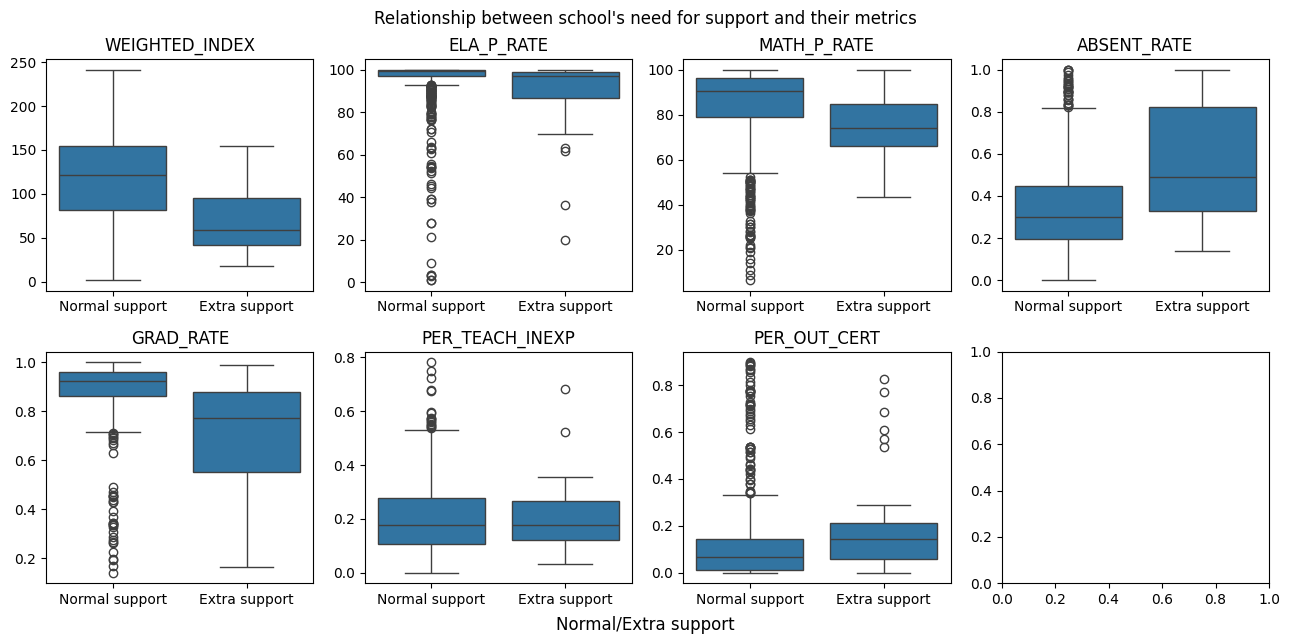

In [21]:
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (13, 6))

counter = 0
for var in ['WEIGHTED_INDEX', 'ELA_P_RATE', 'MATH_P_RATE', 'ABSENT_RATE', 'GRAD_RATE', 'PER_TEACH_INEXP', 'PER_OUT_CERT']:
    ax_obj = ax[counter // 4][counter % 4]
    sns.boxplot(data = nysed_2024, x = 'HELP_INDICATOR', y = var, ax = ax_obj)
    ax_obj.set_title(var)
    ax_obj.set_xticks(ticks = [0, 1], labels = ['Normal support', 'Extra support'])

    ax_obj.set_xlabel("")
    ax_obj.set_ylabel("")

    counter += 1

fig.tight_layout() # make sure that the graph titles and axes don't overlap with each other
fig.suptitle('Relationship between school\'s need for support and their metrics', y = 1.02)
fig.supxlabel('Normal/Extra support', y = -0.02)

Overall, schools that are classified as needing extra support have undesirable results on most of the school evaluation metrics. This is an expected results, since the main reason for a school to warrant extra support is poor student and/or teacher performance.

However, regarding the percentage of teachers with 4 years of experience or lower (```PER_TEACH_INEXP```), there is no discernible difference between schools with normal support and schools with extra support. There are even more schools with high percentage of inexperienced teachers in the "Normal support" group than in the "Extra support" group.

From my perspective, this might be influenced by some factors such as teachers making personal choice of employment place, expanding schools needing newly graduated teachers to accommodate more students, or small schools with few teachers skewing the percentages. Teachers with low level of experience is not usually a metric to determine if a school should need extra support or not.

Text(0.5, -0.02, 'School accountability status (Level of support and improvement needed)')

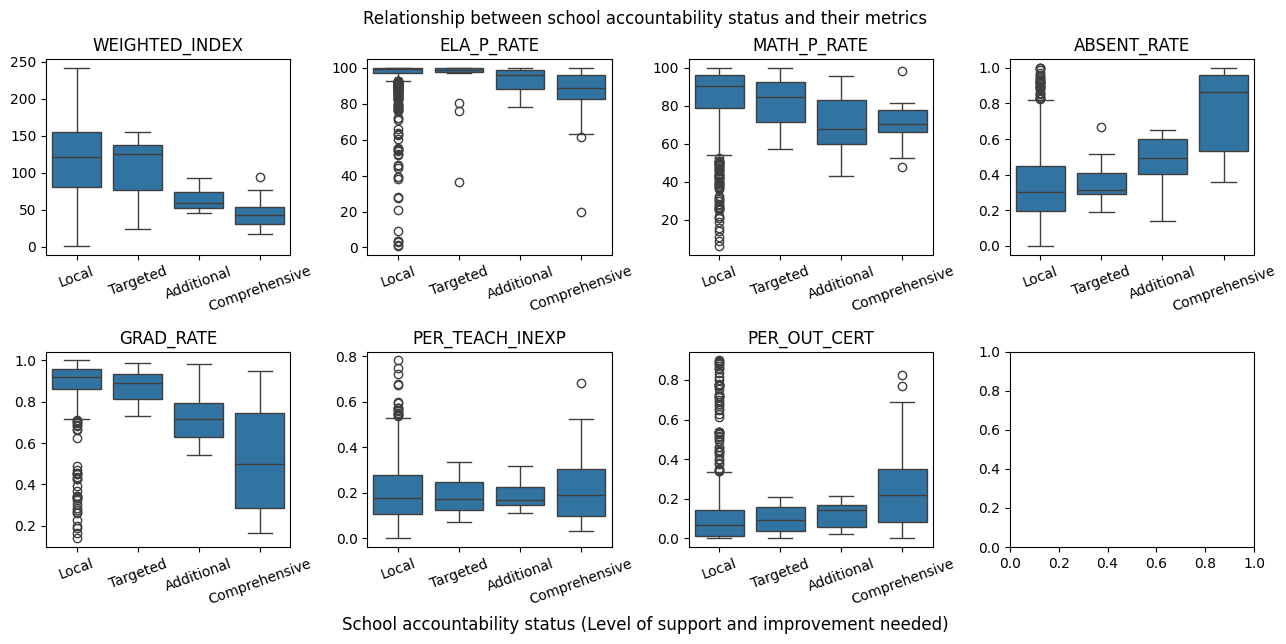

In [22]:
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (13, 6))

counter = 0
for var in ['WEIGHTED_INDEX', 'ELA_P_RATE', 'MATH_P_RATE', 'ABSENT_RATE', 'GRAD_RATE', 'PER_TEACH_INEXP', 'PER_OUT_CERT']:
    ax_obj = ax[counter // 4][counter % 4]
    sns.boxplot(data = nysed_2024, x = 'OVERALL_STATUS', y = var, ax = ax_obj)
    ax_obj.set_title(var)
    ax_obj.set_xticks(ticks = [0, 1, 2, 3], labels = ['Local', 'Targeted', 'Additional', 'Comprehensive'])
    ax_obj.tick_params(axis = 'x', labelrotation = 20)

    ax_obj.set_xlabel("")
    ax_obj.set_ylabel("")

    counter += 1

fig.tight_layout() # make sure that the graph titles and axes don't overlap with each other
fig.suptitle('Relationship between school accountability status and their metrics', y = 1.02)
fig.supxlabel('School accountability status (Level of support and improvement needed)', y = -0.02)

Breaking down to individual accountability status levels, the weighted performance index (```WEIGHTED_INDEX```), absent rate (```ABSENT_RATE```) and graduation rate (```GRAD_RATE```) has shown a significant progression towards the undesirable levels in order of increasing level of support and improvement. For example, the median absent rate of schools with normal support (Local) is around 0.3, compared to 0.9 in schools needing Comprehensive support.

The percentage of inexperienced teachers (```PER_TEACH_INEXP```) is the least different metric across differing accountability status, as evidenced by the median line of the box plots (all around 0.2).

### 6. What is the relationship between federal/local expenditure per student and some metrics for school evaluation?

In [23]:
nysed_2024_exp_cat = nysed_2024.copy()
nysed_2024_exp_cat['EXP_QUARTILE'] = pd.qcut(nysed_2024['PER_FED_STATE_LOCAL_EXP'], q = 4) # split into quartiles (4 parts with equal sizes)
nysed_2024_exp_cat.head()

,INSTITUTION_ID,ENTITY_CD,ENTITY_NAME,WEIGHTED_INDEX,ENROLLMENT,ABSENT_COUNT,GRAD_COUNT,COHORT_COUNT,ELA_P_RATE,MATH_P_RATE,...,NUM_OUT_CERT,OVERALL_STATUS,NEEDS_INDEX_DESCRIPTION,ABSENT_RATE,GRAD_RATE,PER_FED_STATE_LOCAL_EXP,PER_TEACH_INEXP,PER_OUT_CERT,HELP_INDICATOR,EXP_QUARTILE
0,800000055743,10100010034,ALBANY HIGH SCHOOL,82.2,3046,1550,549,704,98.9,84.3,...,14,Local Support and Improvement,High Need/Resource Category: Urban-Suburban Di...,0.508864,0.779830,34020.283285,0.268085,0.065421,0,"(33163.077, 80138.655]"
1,800000055479,10201040001,BERNE-KNOX-WESTERLO JUNIOR-SENIOR HS,142.3,222,42,47,53,100.0,86.7,...,1,Local Support and Improvement,Average Need/Resource Category Districts,0.189189,0.886792,35220.098160,0.268293,0.024390,0,"(33163.077, 80138.655]"
2,800000055439,10306060008,BETHLEHEM CENTRAL SENIOR HIGH SCHOOL,198.1,1374,155,333,349,99.4,92.1,...,1,Local Support and Improvement,Low Need/Resource Category Districts,0.112809,0.954155,23420.739985,0.081818,0.009346,0,"(11519.780999999999, 25820.997]"
3,800000055436,10402060001,RAVENA-COEYMANS-SELKIRK SR HS,129.2,530,164,118,133,100.0,87.9,...,3,Local Support and Improvement,Average Need/Resource Category Districts,0.309434,0.887218,27021.337838,0.406780,0.054545,0,"(25820.997, 29200.82]"
4,800000055426,10500010007,COHOES HIGH SCHOOL,94.0,619,326,109,132,100.0,81.0,...,0,Local Support and Improvement,High Need/Resource Category: Urban-Suburban Di...,0.526656,0.825758,25073.814503,0.153846,0.000000,0,"(11519.780999999999, 25820.997]"


Federal and local expenditure per student has the most significant effect on percentage of teachers out of certification. The bottom 25% of schools with the lowest expenditure per student had a high proportion of out-of-certification teachers, while the figure sharply dropped when expenditure per student increased to the second quartile. Perhaps with additional government expenditure, the schools could easily attract well-qualified teachers 

Increasing levels of expenditure per student was actually associated with lower weighted index (overall indicator of test performance), higher chronic absenteeism rate, and lower graduation rate. One possible explanation is that federal and/or local governments may prioritize schools needing better support.

On the contrary, the participation rate in ELA assessments was not affected significantly by outside government expenditure, although the top 25% of schools with highest expenditure had a slightly higher participation rate than that of the bottom 25%.

Text(0.5, -0.02, 'Quartile of federal/local expenditure per student (Q4 = highest)')

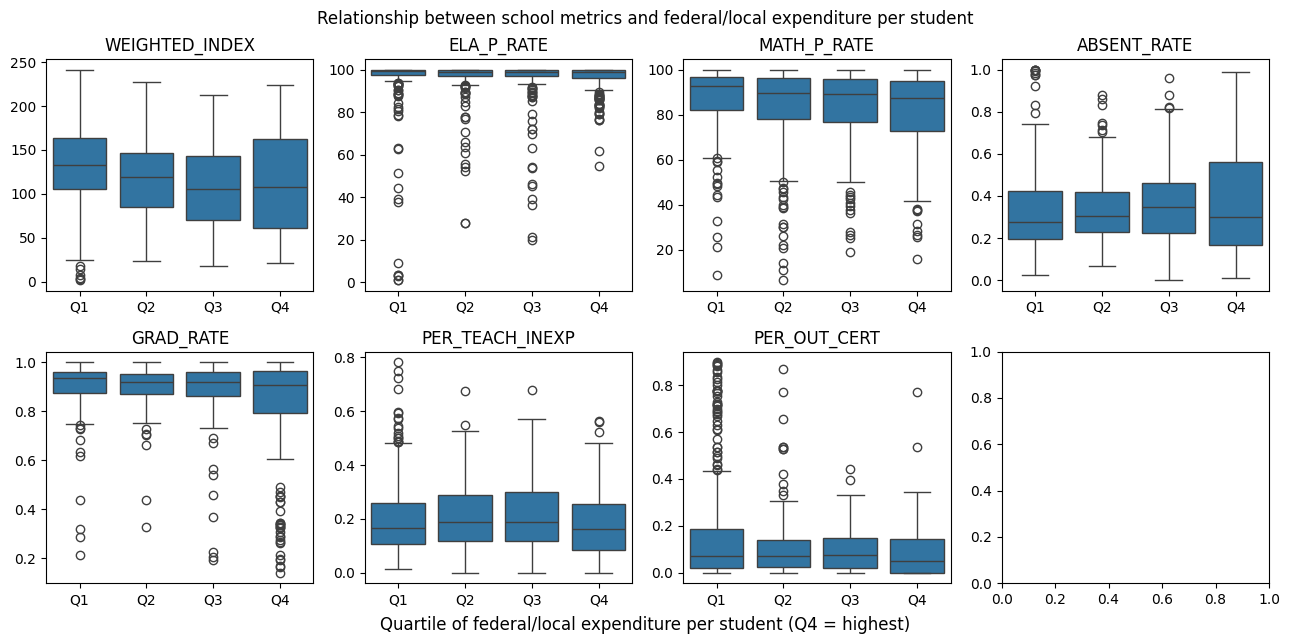

In [24]:
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (13, 6))

counter = 0
for var in ['WEIGHTED_INDEX', 'ELA_P_RATE', 'MATH_P_RATE', 'ABSENT_RATE', 'GRAD_RATE', 'PER_TEACH_INEXP', 'PER_OUT_CERT']:
    ax_obj = ax[counter // 4][counter % 4]
    sns.boxplot(data = nysed_2024_exp_cat, x = 'EXP_QUARTILE', y = var, ax = ax_obj)
    ax_obj.set_title(var)
    ax_obj.set_xticks(ticks = [0, 1, 2, 3], labels = ['Q1', 'Q2', 'Q3', 'Q4'])

    ax_obj.set_xlabel("")
    ax_obj.set_ylabel("")

    counter += 1

fig.tight_layout() # make sure that the graph titles and axes don't overlap with each other
fig.suptitle('Relationship between school metrics and federal/local expenditure per student', y = 1.02)
fig.supxlabel('Quartile of federal/local expenditure per student (Q4 = highest)', y = -0.02)

### 7. What is the relationship between participation rates in ELA and Math assessments?

Text(0, 0.5, 'Math participation rate')

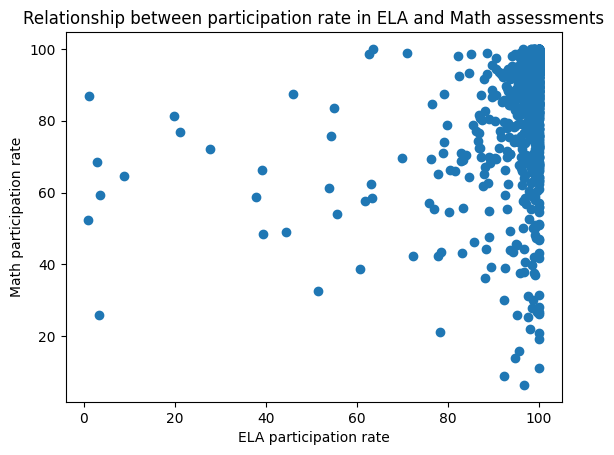

In [25]:
fig, ax = plt.subplots()
ax.scatter(nysed_2024['ELA_P_RATE'], nysed_2024['MATH_P_RATE'])
ax.set_title('Relationship between participation rate in ELA and Math assessments')
ax.set_xlabel('ELA participation rate')
ax.set_ylabel('Math participation rate')

The differences in participation rate in ELA and Math assessments are very significant. Many schools had 100% participation rate in ELA but lower than 50% participation rate in Math, suggesting that those schools may not offer a good Math education, many students opting out of tests, or ELA in these schools are perceived to be much more important than Math.

How many schools have 100% participation rate in both subjects?

In [26]:
perfect_p_schools = nysed_2024[np.logical_and(nysed_2024['ELA_P_RATE'] == 100, nysed_2024['MATH_P_RATE'] == 100)]
print(perfect_p_schools.shape)
perfect_p_schools.head()

(36, 24)


,INSTITUTION_ID,ENTITY_CD,ENTITY_NAME,WEIGHTED_INDEX,ENROLLMENT,ABSENT_COUNT,GRAD_COUNT,COHORT_COUNT,ELA_P_RATE,MATH_P_RATE,...,NUM_TEACH_OC,NUM_OUT_CERT,OVERALL_STATUS,NEEDS_INDEX_DESCRIPTION,ABSENT_RATE,GRAD_RATE,PER_FED_STATE_LOCAL_EXP,PER_TEACH_INEXP,PER_OUT_CERT,HELP_INDICATOR
10,800000054475,51301040003,MORAVIA JUNIOR-SENIOR HS,143.2,268,74,61,68,100.0,100.0,...,41,4,Local Support and Improvement,Average Need/Resource Category Districts,0.276119,0.897059,30911.032823,0.204545,0.097561,0
37,800000054440,60401040006,CASSADAGA VALLEY MIDDLE/HIGH SCHOOL,119.6,213,36,62,69,100.0,100.0,...,45,2,Local Support and Improvement,High Need/Resource Category: Rural Districts,0.169014,0.898551,31479.309896,0.152174,0.044444,0
59,800000053757,100501040003,TACONIC HILLS JUNIOR/SENIOR HIGH,143.7,343,112,88,103,100.0,100.0,...,53,9,Local Support and Improvement,Average Need/Resource Category Districts,0.326531,0.854369,38743.334686,0.357143,0.169811,0
92,800000052908,140600010102,CITY HONORS SCHOOL,199.2,592,130,139,145,100.0,100.0,...,81,4,Local Support and Improvement,High Need/Resource Category: Large City Districts,0.219595,0.958621,26707.828598,0.024390,0.049383,0
127,800000052047,142101040002,AKRON HIGH SCHOOL,170.7,391,95,112,116,100.0,100.0,...,44,0,Local Support and Improvement,Average Need/Resource Category Districts,0.242967,0.965517,20243.232376,0.090909,0.000000,0


### 8. Does the number of students enrolled in a school have an impact on the school's academic performance?

Text(0, 0.5, 'Weighted average performance index')

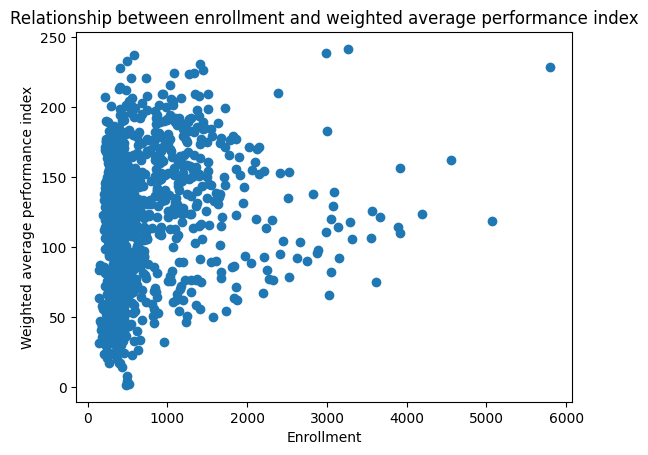

In [27]:
fig, ax = plt.subplots()
ax.scatter(nysed_2024['ENROLLMENT'], nysed_2024['WEIGHTED_INDEX'])
ax.set_title('Relationship between enrollment and weighted average performance index')
ax.set_xlabel('Enrollment')
ax.set_ylabel('Weighted average performance index')

Text(0, 0.5, 'Weighted average performance index')

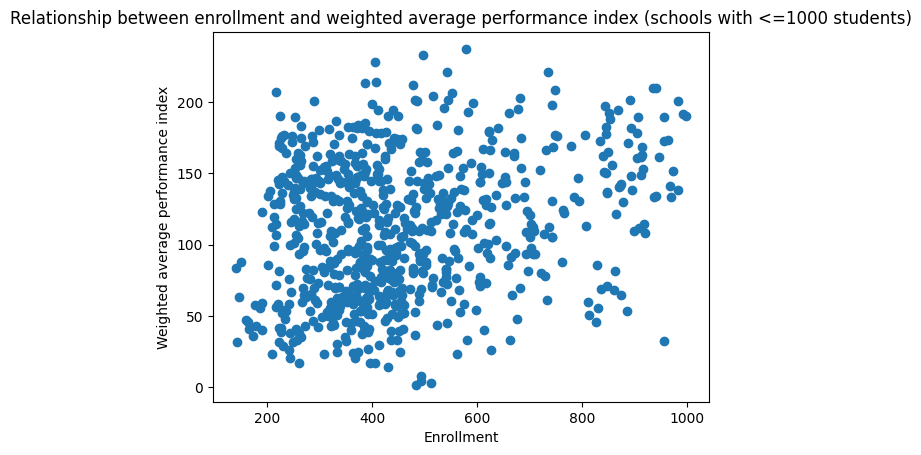

In [28]:
# Zoom into schools with enrollment <= 1000
few_enrolled = nysed_2024[nysed_2024['ENROLLMENT'] <= 1000]

fig, ax = plt.subplots()
ax.scatter(few_enrolled['ENROLLMENT'], few_enrolled['WEIGHTED_INDEX'])
ax.set_title('Relationship between enrollment and weighted average performance index (schools with <=1000 students)')
ax.set_xlabel('Enrollment')
ax.set_ylabel('Weighted average performance index')

### 9. Feature creation - the student-to-teacher ratio:

In [29]:
nysed_2024['STUDENT_TO_TEACHER'] = nysed_2024['ENROLLMENT'] / nysed_2024['NUM_TEACH']
nysed_2024.head()

,INSTITUTION_ID,ENTITY_CD,ENTITY_NAME,WEIGHTED_INDEX,ENROLLMENT,ABSENT_COUNT,GRAD_COUNT,COHORT_COUNT,ELA_P_RATE,MATH_P_RATE,...,NUM_OUT_CERT,OVERALL_STATUS,NEEDS_INDEX_DESCRIPTION,ABSENT_RATE,GRAD_RATE,PER_FED_STATE_LOCAL_EXP,PER_TEACH_INEXP,PER_OUT_CERT,HELP_INDICATOR,STUDENT_TO_TEACHER
0,800000055743,10100010034,ALBANY HIGH SCHOOL,82.2,3046,1550,549,704,98.9,84.3,...,14,Local Support and Improvement,High Need/Resource Category: Urban-Suburban Di...,0.508864,0.779830,34020.283285,0.268085,0.065421,0,12.961702
1,800000055479,10201040001,BERNE-KNOX-WESTERLO JUNIOR-SENIOR HS,142.3,222,42,47,53,100.0,86.7,...,1,Local Support and Improvement,Average Need/Resource Category Districts,0.189189,0.886792,35220.098160,0.268293,0.024390,0,5.414634
2,800000055439,10306060008,BETHLEHEM CENTRAL SENIOR HIGH SCHOOL,198.1,1374,155,333,349,99.4,92.1,...,1,Local Support and Improvement,Low Need/Resource Category Districts,0.112809,0.954155,23420.739985,0.081818,0.009346,0,12.490909
3,800000055436,10402060001,RAVENA-COEYMANS-SELKIRK SR HS,129.2,530,164,118,133,100.0,87.9,...,3,Local Support and Improvement,Average Need/Resource Category Districts,0.309434,0.887218,27021.337838,0.406780,0.054545,0,8.983051
4,800000055426,10500010007,COHOES HIGH SCHOOL,94.0,619,326,109,132,100.0,81.0,...,0,Local Support and Improvement,High Need/Resource Category: Urban-Suburban Di...,0.526656,0.825758,25073.814503,0.153846,0.000000,0,11.903846


Distribution of student-to-teacher ratio:

Text(0.5, 1.0, 'Box plot')

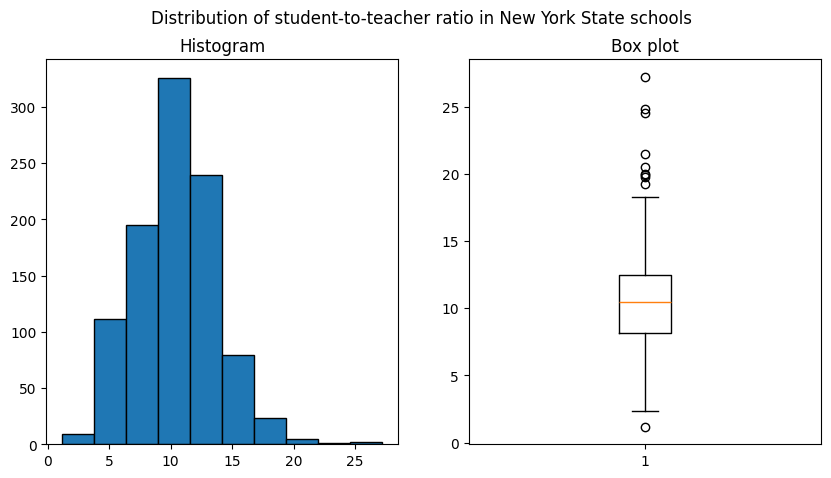

In [30]:
fig, ax = plt.subplots(figsize = (10, 5), nrows = 1, ncols = 2)
fig.suptitle('Distribution of student-to-teacher ratio in New York State schools')

ax[0].hist(nysed_2024['STUDENT_TO_TEACHER'], edgecolor = 'black')
ax[0].set_title('Histogram')

ax[1].boxplot(nysed_2024['STUDENT_TO_TEACHER'])
ax[1].set_title('Box plot')

The majority of schools had 10 students for each teacher, which is a reasonable number that aligns with the average of developed countries in the world. The student-to-teacher ratios in high schools across New York State followed a slightly right-skewed distribution, with outlier schools having more than 20 students for each teacher.

Text(0, 0.5, 'Weighted average performance index')

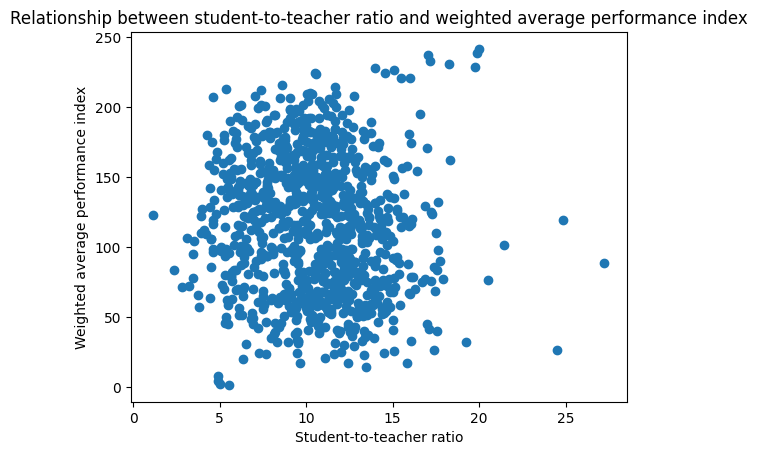

In [31]:
fig, ax = plt.subplots()
ax.scatter(nysed_2024['ENROLLMENT'] / nysed_2024['NUM_TEACH'], nysed_2024['WEIGHTED_INDEX'])
ax.set_title('Relationship between student-to-teacher ratio and weighted average performance index')
ax.set_xlabel('Student-to-teacher ratio')
ax.set_ylabel('Weighted average performance index')

There is no significant relationship between enrollment and weighted index, or student-to-teacher ratio and weighted index.

We can still see the typical ranges of these numbers, such as most schools have student-to-teacher ratio ranging from 5 to 17, and enrollment below 1000.

### III. Data preprocessing

In [32]:
nysed_2024_features_df = nysed_2024[['ABSENT_RATE', 'GRAD_RATE', 'PER_FED_STATE_LOCAL_EXP', 'ELA_P_RATE', 'MATH_P_RATE',
                                     'PER_TEACH_INEXP', 'PER_OUT_CERT', 'STUDENT_TO_TEACHER']]
nysed_2024_features_df.head()

,ABSENT_RATE,GRAD_RATE,PER_FED_STATE_LOCAL_EXP,ELA_P_RATE,MATH_P_RATE,PER_TEACH_INEXP,PER_OUT_CERT,STUDENT_TO_TEACHER
0,0.508864,0.779830,34020.283285,98.9,84.3,0.268085,0.065421,12.961702
1,0.189189,0.886792,35220.098160,100.0,86.7,0.268293,0.024390,5.414634
2,0.112809,0.954155,23420.739985,99.4,92.1,0.081818,0.009346,12.490909
3,0.309434,0.887218,27021.337838,100.0,87.9,0.406780,0.054545,8.983051
4,0.526656,0.825758,25073.814503,100.0,81.0,0.153846,0.000000,11.903846


Text(0.5, 1.0, 'Correlation between some features for clustering in the NYSED 2024 dataset')

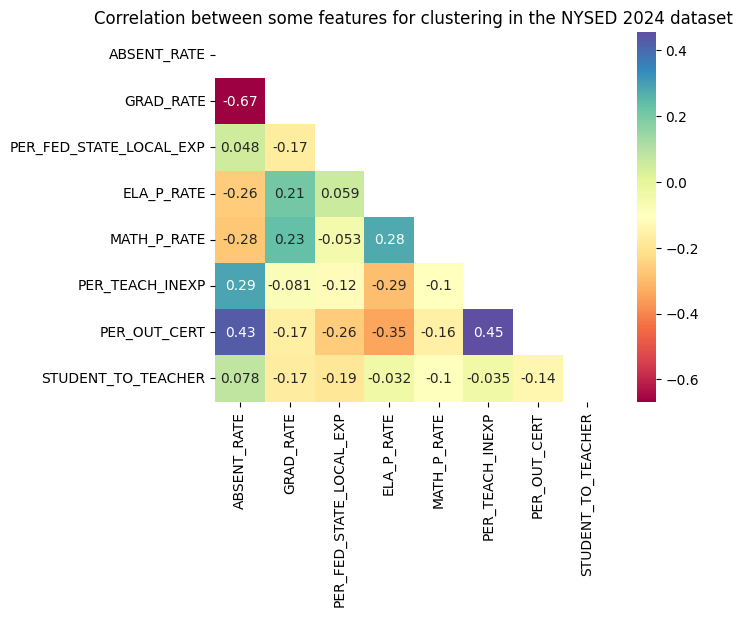

In [33]:
# Check the pairwise correlations again
# Check the correlation between selected numerical columns
features_corr = nysed_2024_features_df.corr()
plt.figure()
sns.heatmap(data = features_corr, mask = np.triu(features_corr), cmap = 'Spectral', annot = True)
# Used np.triu to show only the lower triangle of the correlation graph
plt.title('Correlation between some features for clustering in the NYSED 2024 dataset')

In [34]:
# Convert to a NumPy array
X = nysed_2024_features_df.values
print(X.shape)
print(type(X))

(990, 8)
<class 'numpy.ndarray'>


In [35]:
# Preprocessing pipeline because we have missing data
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer # We have missing data, so we have to impute first
from sklearn.pipeline import Pipeline

preprocessing = Pipeline([('scaler', StandardScaler()), ('imputer', KNNImputer())])
X_new = preprocessing.fit_transform(X)

### IV. Visualizing multi-dimensional data using PCA and t-SNE

In [36]:
# Set seed for reproducibility
my_seed = 275225

In [37]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [38]:
# Use PCA to determine explained variance ratio
pca = PCA(random_state = my_seed)
pca_fit = pca.fit(X_new)
pca_transform = pca_fit.transform(X_new)
print(pca_transform.shape)
print(pca_fit.explained_variance_ratio_)

(990, 8)
[0.30842451 0.17954167 0.1472492  0.11364203 0.08658949 0.0804908
 0.05028279 0.03377952]


Text(0.5, 0.98, 'PCA results on the dataset')

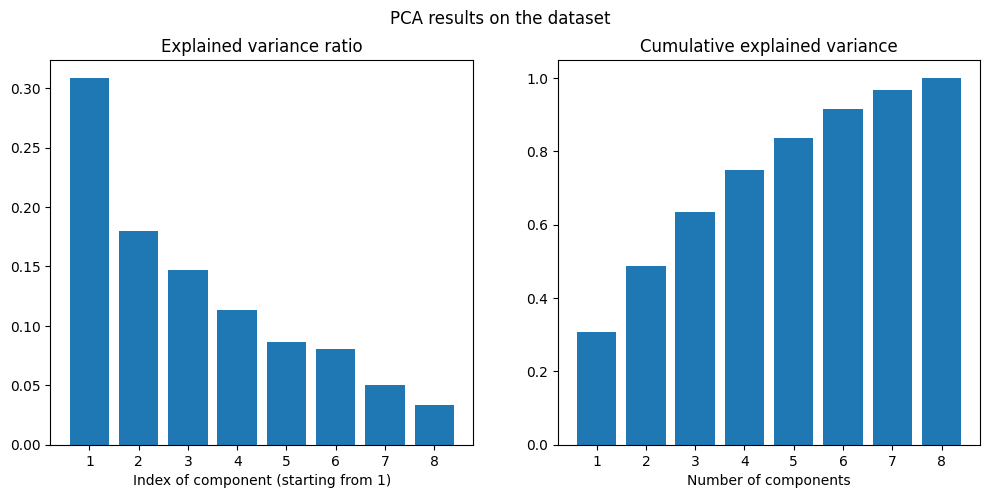

In [39]:
# Plot explained variance ratio with PCA
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))

ax[0].bar([x + 1 for x in range(pca_transform.shape[1])], pca_fit.explained_variance_ratio_)
ax[0].set_xlabel('Index of component (starting from 1)')
ax[0].set_title('Explained variance ratio')

ax[1].bar([x + 1 for x in range(pca_transform.shape[1])], np.cumsum(pca_fit.explained_variance_ratio_))
ax[1].set_xlabel('Number of components')
ax[1].set_title('Cumulative explained variance')

fig.suptitle('PCA results on the dataset')

In [40]:
# Visualize PCA with 2 principal components (not so accurate - roughly 50% of the variance)
pca_2d = PCA(n_components = 2, random_state = my_seed)
pca_2d_transformed = pca_2d.fit_transform(X_new) # output data points in 2D

# Coloring by existing labels
pca_2d_df = pd.DataFrame({'pca_x': pca_2d_transformed[:, 0], 'pca_y': pca_2d_transformed[:, 1], 'cluster_labels': nysed_2024['HELP_INDICATOR']})
pca_2d_df.head()

,pca_x,pca_y,cluster_labels
0,0.649992,1.023198,0
1,-0.816103,-0.033104,0
2,-1.619400,-0.354795,0
3,0.079163,-0.861398,0
4,0.131728,0.638047,0


Text(0, 0.5, 'PC2')

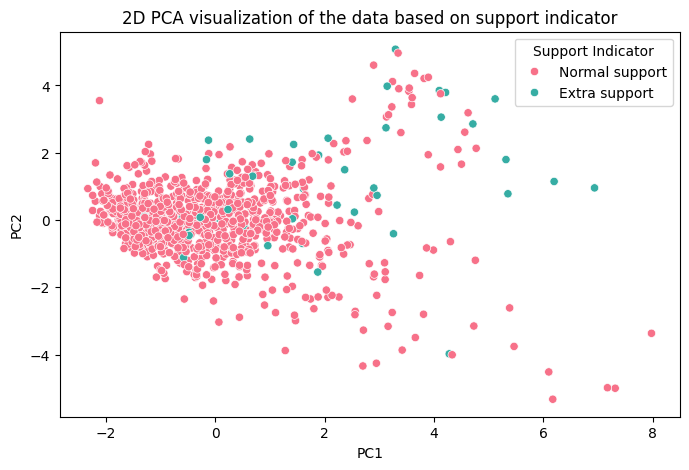

In [41]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.scatterplot(data = pca_2d_df, x = 'pca_x', y = 'pca_y', hue = 'cluster_labels', palette = 'husl', ax = ax)

# The point colors in the legend changed colors when I attempted to work on customizing legend labels...
# https://stackoverflow.com/questions/65567690/matplotlib-legend-colors-change-when-changing-legend-labels
handles, labels = ax.get_legend_handles_labels()
labels = ['Normal support', 'Extra support']
ax.legend(handles, labels, title = 'Support Indicator')
ax.set_title('2D PCA visualization of the data based on support indicator')
ax.set_xlabel('PC1'); ax.set_ylabel('PC2')

Text(0.5, 0, 'PC3')

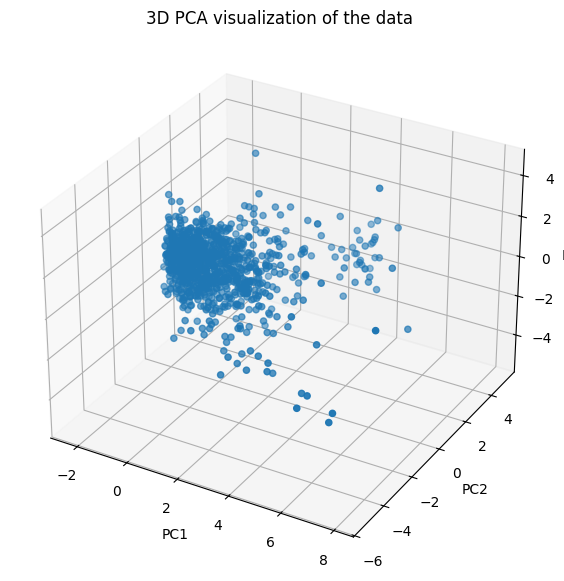

In [42]:
# What about 3D? (roughly 60% of the variance)
pca_3d = PCA(n_components = 3, random_state = my_seed)
pca_3d_transformed = pca_3d.fit_transform(X_new)

# Coloring by existing labels
pca_3d_df = pd.DataFrame({'pca_x': pca_3d_transformed[:, 0], 'pca_y': pca_3d_transformed[:, 1],
                          'pca_z': pca_3d_transformed[:, 2], 'cluster_labels': nysed_2024['OVERALL_STATUS']})

fig = plt.figure(figsize = (19, 7))
ax = fig.add_subplot(projection = '3d')
ax.scatter(pca_3d_transformed[:, 0], pca_3d_transformed[:, 1], pca_3d_transformed[:, 2])
ax.set_title('3D PCA visualization of the data')
ax.set_xlabel('PC1'); ax.set_ylabel('PC2'); ax.set_zlabel('PC3')

In [43]:
tsne_2d = TSNE(n_components = 2, random_state = my_seed)
tsne_2d_transformed = tsne_2d.fit_transform(X_new)

tsne_2d_df = pd.DataFrame({'tsne_x': tsne_2d_transformed[:, 0], 'tsne_y': tsne_2d_transformed[:, 1], 'cluster_labels': nysed_2024['HELP_INDICATOR']})
tsne_2d_df.head()

,tsne_x,tsne_y,cluster_labels
0,5.952761,-2.741785,0
1,-12.330298,16.256586,0
2,-15.786766,-21.091436,0
3,-3.477322,12.646534,0
4,0.977363,-11.977015,0


Text(0, 0.5, 't-SNE dimension 2')

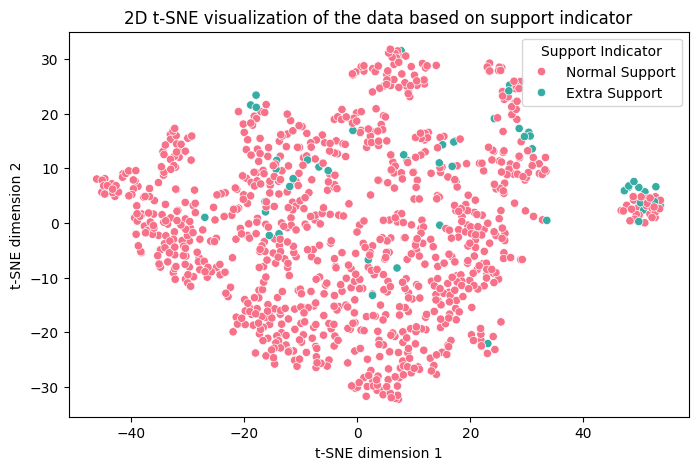

In [44]:
# Plot these transformed points on a 2D plane
fig, ax = plt.subplots(figsize = (8, 5))

sns.scatterplot(data = tsne_2d_df, x = 'tsne_x', y = 'tsne_y', hue = 'cluster_labels', palette = 'husl', ax = ax)
handles, labels = ax.get_legend_handles_labels()
labels = ['Normal Support', 'Extra Support']
ax.legend(handles, labels, title = 'Support Indicator')

ax.set_title('2D t-SNE visualization of the data based on support indicator')
ax.set_xlabel('t-SNE dimension 1'); ax.set_ylabel('t-SNE dimension 2')

Text(0.5, 0, 't-SNE dimension 3')

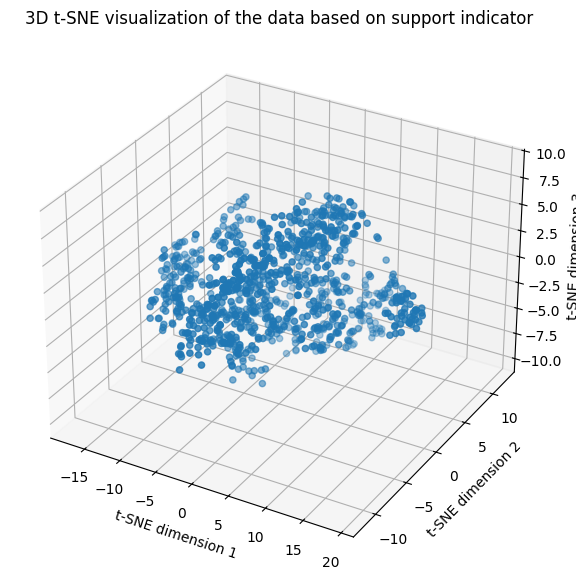

In [45]:
# What about t-SNE on a 3D surface?
tsne_3d = TSNE(n_components = 3)
tsne_transformed_3d = tsne_3d.fit_transform(X_new)

# Plot these transformed points on a 3D plane
# https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html

fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(projection = '3d')

ax.scatter(tsne_transformed_3d[:, 0], tsne_transformed_3d[:, 1], tsne_transformed_3d[:, 2])
ax.set_title('3D t-SNE visualization of the data based on support indicator')
ax.set_xlabel('t-SNE dimension 1'); ax.set_ylabel('t-SNE dimension 2'); ax.set_zlabel('t-SNE dimension 3')

### V. Implementing clustering algorithms (unsupervised evaluation)

The clustering algorithms that I want to implement is: Agglomerative Clustering (a type of Hierarchical Clustering), K-means, and DBSCAN.

I will split the schools into 4 clusters based on the accountability status. In the original NYSED designation, the accountability statuses are divided into: (1) Local Support and Improvement, (2) Targeted Support and Improvement, (3) Additional Targeted Support and Improvement, and (4) Comprehensive Support and Improvement.

To evaluate these clustering algorithms, I will use the metrics:

- Existing accountability status designation in the NYSED dataset

- External metrics: silhouette score, Dunn's index, Calinski-Harabasz index, Davies-Bouldin index, etc.

In [46]:
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN, AffinityPropagation # not using DBSCAN yet because number of clusters are not specified 
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, rand_score, adjusted_rand_score

In [47]:
# Write a function to reuse different algorithms and output results
def cluster_results(model_name, model):

    # Initialize the list of metrics to be included in the output table
    silhouette_scores = []
    calinski_harabasz_scores = []
    davies_bouldin_scores = []

    # Add each individual model's performance to the list of metrics
    cluster_labels = model.fit_predict(X_new)
    silhouette_scores.append(silhouette_score(X_new, cluster_labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(X_new, cluster_labels))
    davies_bouldin_scores.append(davies_bouldin_score(X_new, cluster_labels))

    # Aggregate the results into a DataFrame    
    df = pd.DataFrame({'model_name': model_name, 'silhouette_score': silhouette_scores,
                       'calinski_harabasz_score': calinski_harabasz_scores, 'davies_bouldin_score': davies_bouldin_scores})
    return df    

In [48]:
# Test on models with default number of clusters and default (hyper)parameters
model_list = [('Agglomerative Clustering', AgglomerativeClustering()), ('K-Means', KMeans()),
              ('DBSCAN', DBSCAN()), ('Affinity Propagation', AffinityPropagation())]

entire_results = pd.concat([cluster_results(model_name, model) for model_name, model in model_list], ignore_index = True)
entire_results.sort_values('silhouette_score', ascending = False)
entire_results

,model_name,silhouette_score,calinski_harabasz_score,davies_bouldin_score
0,Agglomerative Clustering,0.245040,199.127260,2.033523
1,K-Means,0.179029,199.829723,1.329470
2,DBSCAN,-0.292223,4.101684,1.660507
3,Affinity Propagation,0.132879,68.773605,1.266568


Both Agglomerative Clustering and K-Means did quite well on the data. However, the silhouette score of Agglomerative Clustering is significantly higher than K-Means, and the Davies-Bouldin score of K-Means is lower (more desirable) than Agglomerative Clustering.

#### References/ Inspirations:

- https://www.kaggle.com/code/nguyenhuudien/ph-n-c-m-d-li-u-k-means-dbscan-v-ap (in Vietnamese)